In [31]:
# the fllowing code loads two sanple images, using scikit learn load_sample_images()
# loading two color images , then it creates two 7 x& filters one with vertical line and one with hirizontal lines in the 
# middle, and then applies to both images by tf conv2d() function with zero padding and striden

import numpy as np
from sklearn.datasets import load_sample_images

dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width , channels = dataset.shape



In [52]:
# creating twi filters
filters_test = np.zeros(shape=(7,7,channels, 2), dtype=np.float32)
filters_test[:,3,:,0] = 1 # vetical line
filters_test[3,:,:,1] = 1 # horizonatal line

filters_test2 = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)
filters_test3 = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)
filters_test3[:,:,:,:] = 1

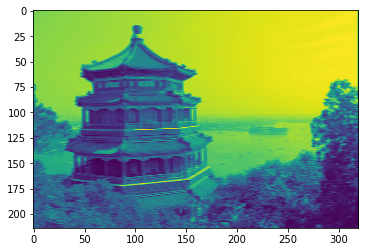

In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt

# creating a graph with input X plus a convolutional laer applying two filters

# X is the input mini batch (A 4D tensor)
# filter_test is the filters another 4D tensors
# strides is a 4 element 1D array where the two central elements are vertical and horizontal strides
# The fitst and last datae are always set to 1, these canbe used ti skip some, previous layers feature maps
# padding must either be "VALID" or "SAME":
# if set to valid then convolutional layer does not use zero padding, and may ignore some pixels at the end
# if set to "SAME" the convolutional layer uses zero padding if necessary.
# iuout neirons are equal to the number of input neurons devided by the stride
# rounded up ceil(13/5).Then zeros are added as evenly as possible around the inputs

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})

plt.imshow(output[0,:,:,1])
plt.show()

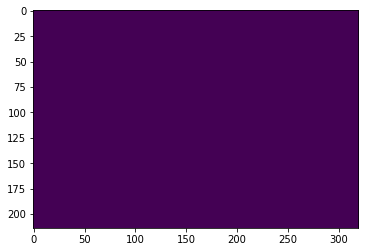

In [50]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution2 = tf.nn.conv2d(X, filters_test2, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output2 = sess.run(convolution2, feed_dict={X:dataset})

plt.imshow(output2[0,:,:,1])
plt.show()

#filter2 with all zeros

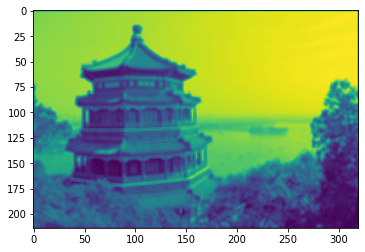

In [53]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution3 = tf.nn.conv2d(X, filters_test3, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output3 = sess.run(convolution3, feed_dict={X:dataset})

plt.imshow(output3[0,:,:,1])
plt.show()

#filter2 with all ones